<a href="https://colab.research.google.com/github/niruthikka24/Renewable-Energy-Site-Selection/blob/main/APAN56_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files, drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of SriLanka_Weather_Dataset.csv')
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [ ]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation',
       'country', 'city'],
      dtype='object')

In [ ]:
print(df['elevation'].min())
print(df['elevation'].max())

0.0
1281.0


Text(0, 0.5, 'wind speed')

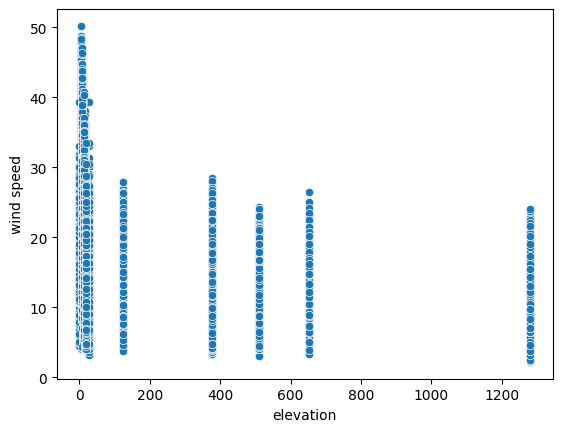

In [ ]:
sns.scatterplot(x = df['elevation'], y = df['windspeed_10m_max'])
plt.xlabel('elevation')
plt.ylabel('wind speed')
# plt.title('Seaborn Scatter Plot Example')

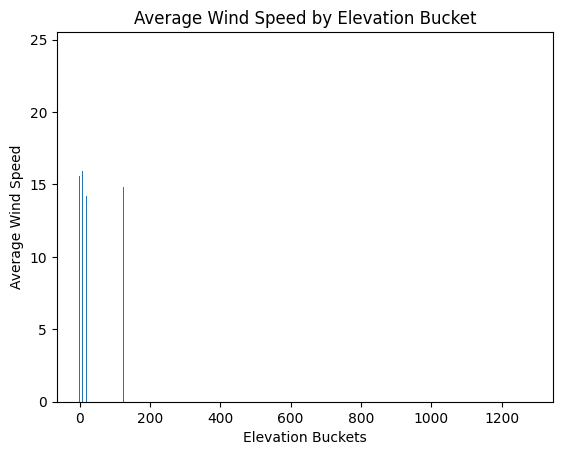

In [ ]:
# Define the number of elevation buckets and their size
num_buckets = 5
bucket_size = (df['elevation'].max() - df['elevation'].min()) / num_buckets

# Create a new column 'elevationBucket' to store the bucket for each record
df['elevationBucket'] = ((df['elevation'] - df['elevation'].min()) // bucket_size).astype(int)

# Calculate the average wind speed for each elevation bucket
average_wind_speeds = df.groupby('elevation')['windspeed_10m_max'].mean()

# Create the bar chart
plt.bar(average_wind_speeds.index, average_wind_speeds.values)

# Add labels and a title
plt.xlabel('Elevation Buckets')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed by Elevation Bucket')

# Show the plot
plt.show()


In [ ]:
average_wind_speeds

elevation
0.0       15.594314
5.0       19.441199
6.0       24.305207
7.0       17.770172
8.0       15.898210
9.0       14.319650
10.0      14.319650
12.0      19.753885
13.0      14.215846
15.0      15.907130
16.0      14.267748
18.0      14.319650
20.0      14.215846
26.0      14.319650
27.0      13.198424
124.0     14.846054
125.0     14.846054
376.0     14.691497
510.0     11.783666
652.0     10.987693
1281.0    10.127075
Name: windspeed_10m_max, dtype: float64

Text(0, 0.5, 'shortwave_radiation_sum')

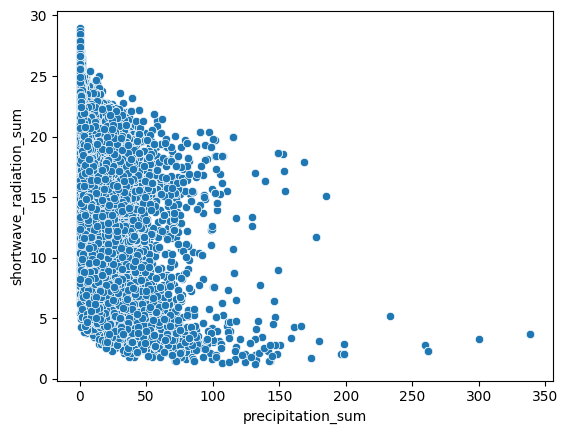

In [ ]:
sns.scatterplot(x = df['precipitation_sum'], y = df['shortwave_radiation_sum'])
plt.xlabel('precipitation_sum')
plt.ylabel('shortwave_radiation_sum')
# plt.title('Seaborn Scatter Plot Example')

In [ ]:
print(df['shortwave_radiation_sum'].min())
print(df['shortwave_radiation_sum'].max())

1.23
28.98


In [ ]:
27.75/4

6.9375

Text(0, 0.5, 'shortwave_radiation_sum')

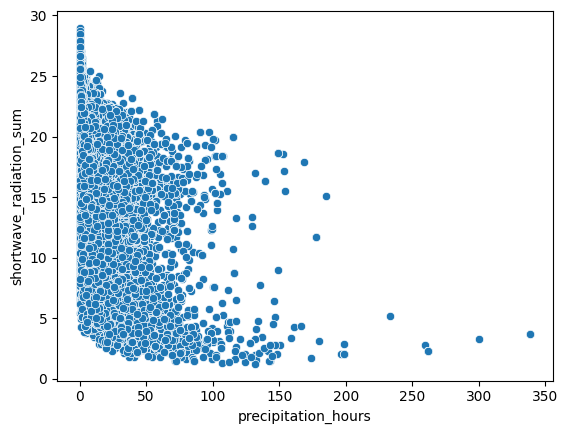

In [ ]:
sns.scatterplot(x = df['precipitation_sum'], y = df['shortwave_radiation_sum'])
plt.xlabel('precipitation_hours')
plt.ylabel('shortwave_radiation_sum')
# plt.title('Seaborn Scatter Plot Example')

In [ ]:
df.shape

(147480, 24)

In [ ]:
list(df.columns)

['time',
 'weathercode',
 'temperature_2m_max',
 'temperature_2m_min',
 'temperature_2m_mean',
 'apparent_temperature_max',
 'apparent_temperature_min',
 'apparent_temperature_mean',
 'sunrise',
 'sunset',
 'shortwave_radiation_sum',
 'precipitation_sum',
 'rain_sum',
 'snowfall_sum',
 'precipitation_hours',
 'windspeed_10m_max',
 'windgusts_10m_max',
 'winddirection_10m_dominant',
 'et0_fao_evapotranspiration',
 'latitude',
 'longitude',
 'elevation',
 'country',
 'city']

In [ ]:
print(df["time"].min())
print(df["time"].max())

2010-01-01
2023-06-17


In [ ]:
print(df["city"].nunique())
df["city"].unique()

30


array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

In [ ]:
df['turbulence_measure'] = df['windgusts_10m_max'] - df['windspeed_10m_max']
df['turbulence_measure'].value_counts()

18.0    1159
16.5    1154
16.9    1047
17.6    1018
17.5     903
        ... 
26.0       1
25.9       1
25.1       1
21.1       1
5.6        1
Name: turbulence_measure, Length: 1392, dtype: int64

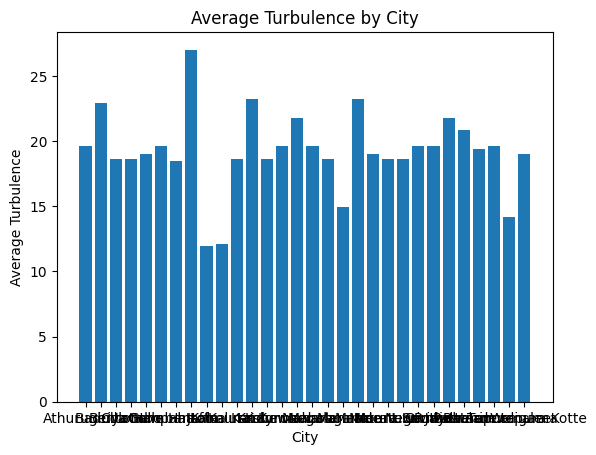

In [ ]:
turbulence_city = df.groupby('city')['turbulence_measure'].mean()

# Create the bar chart
plt.bar(turbulence_city.index, turbulence_city.values)

# Add labels and a title
plt.xlabel('City')
plt.ylabel('Average Turbulence')
plt.title('Average Turbulence by City')

# Show the plot
plt.show()

In [ ]:
df["shortwave_radiation_sum"].describe()

count    147480.000000
mean         18.483513
std           4.214270
min           1.230000
25%          16.220000
50%          19.130000
75%          21.510000
max          28.980000
Name: shortwave_radiation_sum, dtype: float64

(array([  601.,  1685.,  3482.,  7344., 14189., 28488., 41870., 36926.,
        12194.,   701.]),
 array([ 1.23 ,  4.005,  6.78 ,  9.555, 12.33 , 15.105, 17.88 , 20.655,
        23.43 , 26.205, 28.98 ]),
 <BarContainer object of 10 artists>)

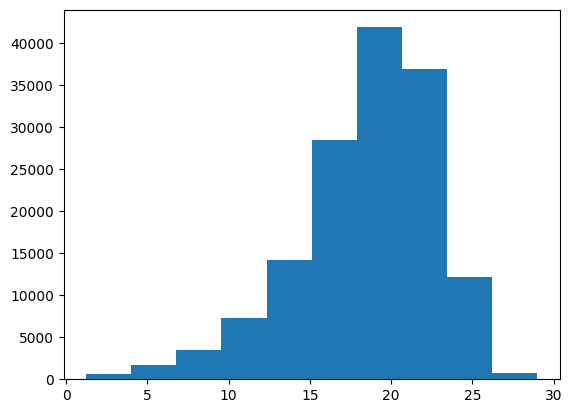

In [ ]:
plt.hist(df["shortwave_radiation_sum"])

In [ ]:
df.dtypes

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object

In [ ]:
df["time"] = pd.to_datetime(df["time"])
df["sunrise"] = pd.to_datetime(df["sunrise"])
df["sunset"] = pd.to_datetime(df["sunset"])

In [ ]:
df["duration"] = (df["sunset"] - df["sunrise"]).dt.total_seconds() / 3600  # Calculate duration in hours

In [ ]:
df_22 = df[df["time"].dt.year==2022]
df_22.shape

(10950, 25)

In [ ]:
# plt.plot(df_22["time"], df_22["shortwave_radiation_sum"], marker='o', linestyle='-', color='b', label='Solar Radiation')
# plt.xlabel('Time')
# plt.ylabel('Solar Radiation')
# plt.title('Solar Radiation Over Time')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()

# plt.tight_layout()  # Adjust layout to prevent clipping of labels

# plt.show()  # Display the plot


<ipython-input-16-a3ecacda597c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


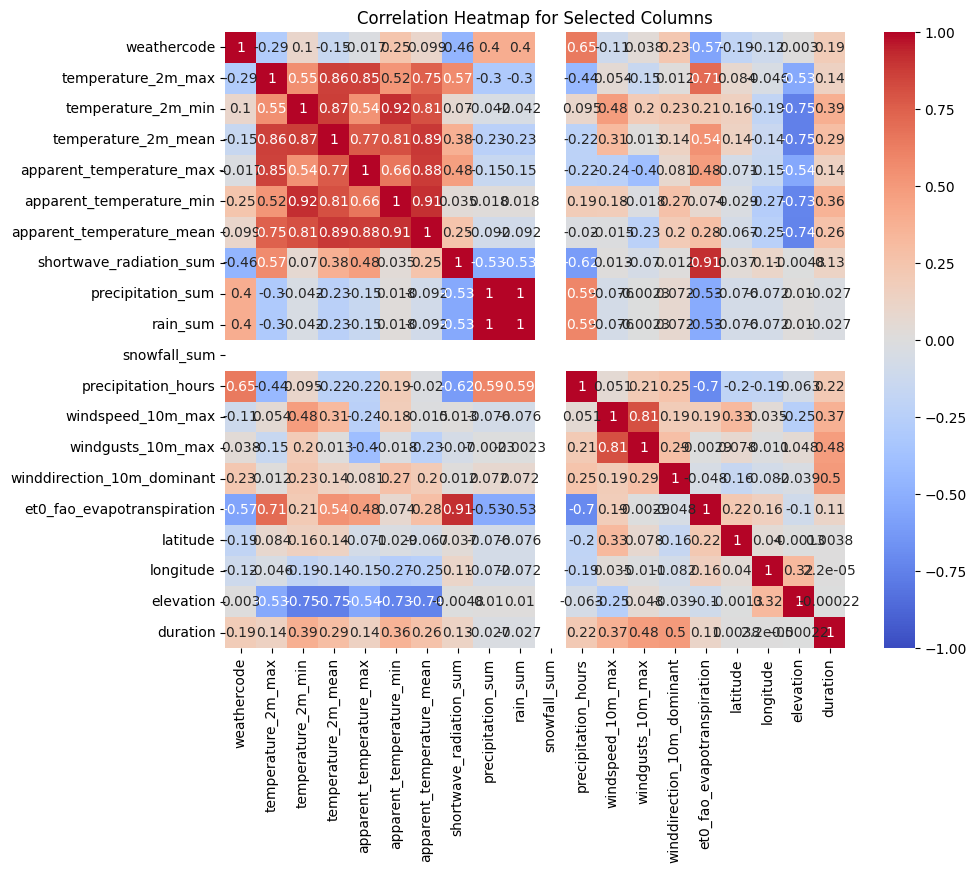

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

In [ ]:
df["duration"].describe()

count    147480.000000
mean         12.124046
std           0.287134
min          11.550000
25%          11.850000
50%          12.133333
75%          12.400000
max          12.700000
Name: duration, dtype: float64

In [ ]:
df["elevation"].corr(df["windspeed_10m_max"])

-0.2508953303346961

In [ ]:
df.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,duration
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333,12.124046
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824,0.287134
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000,11.550000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000,11.850000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000,12.133333
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000,12.400000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000,12.700000


{'whiskers': [<matplotlib.lines.Line2D at 0x78e35f77a8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x78e35f77ae30>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e35f77a650>],
 'medians': [<matplotlib.lines.Line2D at 0x78e35f77b370>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e35f77b610>],
 'means': []}

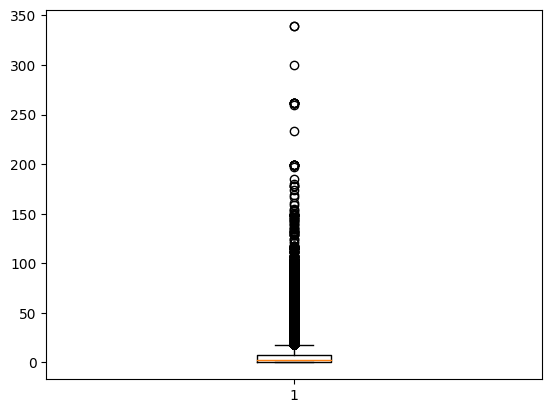

In [ ]:
plt.boxplot(df["precipitation_sum"])

In [ ]:
df["duration"].unique()

array([11.71666667, 11.73333333, 11.75      , 11.76666667, 11.78333333,
       11.8       , 11.81666667, 11.83333333, 11.85      , 11.86666667,
       11.88333333, 11.9       , 11.91666667, 11.93333333, 11.95      ,
       11.96666667, 11.98333333, 12.        , 12.01666667, 12.03333333,
       12.05      , 12.06666667, 12.08333333, 12.1       , 12.11666667,
       12.13333333, 12.15      , 12.16666667, 12.18333333, 12.2       ,
       12.21666667, 12.23333333, 12.25      , 12.26666667, 12.28333333,
       12.3       , 12.31666667, 12.33333333, 12.35      , 12.36666667,
       12.38333333, 12.4       , 12.41666667, 12.45      , 12.46666667,
       12.48333333, 12.5       , 12.51666667, 12.53333333, 12.43333333,
       11.7       , 12.55      , 11.68333333, 12.56666667, 11.63333333,
       11.65      , 11.66666667, 12.58333333, 12.6       , 12.61666667,
       12.63333333, 11.61666667, 11.56666667, 11.58333333, 11.6       ,
       12.65      , 12.66666667, 12.68333333, 12.7       , 11.55

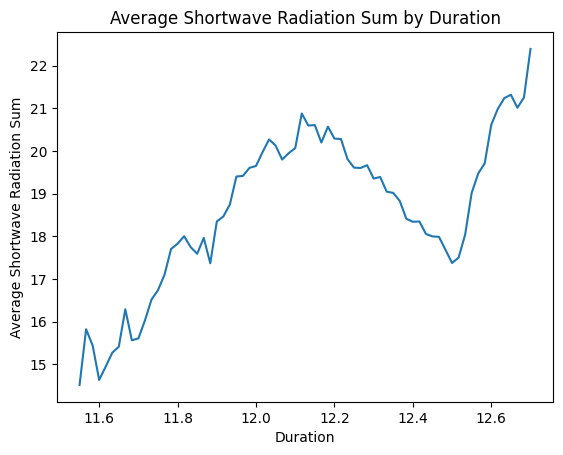

In [ ]:

# Calculate the average shortwave_radiation_sum for each duration
avg_radiation_by_duration = df.groupby('duration')['shortwave_radiation_sum'].mean()

# Create a bar chart
plt.plot(avg_radiation_by_duration.index, avg_radiation_by_duration.values)
plt.xlabel('Duration')
plt.ylabel('Average Shortwave Radiation Sum')
plt.title('Average Shortwave Radiation Sum by Duration')
plt.show()

In [ ]:
df.to_csv("SriLanka_Weather_Dataset_edited.csv", index=False)

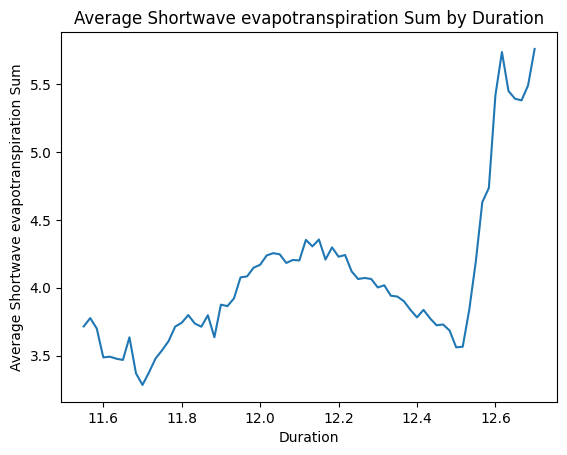

In [ ]:

# Calculate the average shortwave_radiation_sum for each duration
avg_evapotranspiration_by_duration = df.groupby('duration')['et0_fao_evapotranspiration'].mean()

# Create a bar chart
plt.plot(avg_evapotranspiration_by_duration.index, avg_evapotranspiration_by_duration.values)
plt.xlabel('Duration')
plt.ylabel('Average Shortwave evapotranspiration Sum')
plt.title('Average Shortwave evapotranspiration Sum by Duration')
plt.show()

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/sl map files/lka_rdsl_250k_sdlka.shp')

In [ ]:
gdf.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,ROADS_,ROADS_ID,CODE,CLASS,geometry
0,256,255,0,0,4828.5000,1,1,3,NaN,"LINESTRING (82148.211 478792.844, 82056.734 47..."
1,257,256,0,0,1789.3600,2,2,3,NaN,"LINESTRING (83651.273 478342.125, 83633.648 47..."
2,257,256,0,0,1958.3600,3,3,3,NaN,"LINESTRING (83651.273 478342.125, 83663.023 47..."
3,492,489,0,0,3034.9800,4,4,3,NaN,"LINESTRING (81905.672 323098.094, 82031.555 32..."
4,489,490,0,0,61.7061,5,5,2,NaN,"LINESTRING (84571.914 324177.062, 84576.953 32..."


In [ ]:
gdf.columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'ROADS_', 'ROADS_ID',
       'CODE', 'CLASS', 'geometry'],
      dtype='object')

In [ ]:
gdf.shape

(3349, 10)

In [ ]:
gdf['CODE'].value_counts()

2    1304
3    1151
1     891
4       3
Name: CODE, dtype: int64

In [ ]:
extdf = pd.read_csv('/content/drive/MyDrive/city_dist_apan.csv')

In [ ]:
extdf.head()

,City,Distance to Nearest Admin City,Terrain Complexity
0,Colombo,0.00,Rolling and Undulating Terrain
1,Mount Lavinia,12.58,Flat Terrain
2,Kesbewa,21.48,Rolling and Undulating Terrain
3,Moratuwa,20.20,Flat Terrain
4,Maharagama,15.58,Flat Terrain


In [ ]:
extdf['Terrain Complexity'].value_counts()

Rolling and Undulating Terrain    11
Flat Terrain                      11
Hilly and Rolling Terrain          5
Undulating Terrain                 2
Mountaneous Terrain                1
Name: Terrain Complexity, dtype: int64

In [ ]:
# Rename columns using the rename() method
extdf.rename(columns={'City': 'city'}, inplace=True)
# category_mapping = {'Rolling and Undulating Terrain': 3, 'Flat Terrain': 1, 'Hilly and Rolling Terrain': 4,
#                     'Undulating Terrain': 2, 'Mountaneous Terrain': 5}

# # Use the map() function to apply the mapping to the 'Category' column
# df['Category'] = df['Category'].map(category_mapping)
extdf.head()

,city,Distance to Nearest Admin City,Terrain Complexity
0,Colombo,0.00,Rolling and Undulating Terrain
1,Mount Lavinia,12.58,Flat Terrain
2,Kesbewa,21.48,Rolling and Undulating Terrain
3,Moratuwa,20.20,Flat Terrain
4,Maharagama,15.58,Flat Terrain


In [ ]:
df_elevation = df[['city', 'elevation']].drop_duplicates()
merged_df = pd.merge(df_elevation, extdf, on='city', how='inner')
merged_df.head()

,city,elevation,Distance to Nearest Admin City,Terrain Complexity
0,Colombo,16.0,0.00,Rolling and Undulating Terrain
1,Mount Lavinia,10.0,12.58,Flat Terrain
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain
3,Moratuwa,9.0,20.20,Flat Terrain
4,Maharagama,26.0,15.58,Flat Terrain


In [ ]:
# Specify the file path where you want to save the CSV file
file_path = 'cost_df.csv'

# Use the to_csv() method to save the DataFrame as a CSV file
merged_df.to_csv(file_path, index=False)

In [ ]:
merged_df['Distance to Nearest Admin City'].max()

143.09

In [ ]:
merged_df['Distance to Nearest Admin City'].min()

0.0

In [ ]:
merged_df['elevation'].max()

1281.0

In [ ]:
merged_df['elevation'].min()

0.0

In [ ]:
(3 * 33.33 + 1 * 33.33 + 2 * 33.33) / 100

1.9997999999999998

In [ ]:
merged_df.rename(columns={
    'Distance to Nearest Admin City': 'distance_from_urban_centres',
    'Terrain Complexity': 'terrain'}
                 , inplace=True)

In [ ]:
# Define the conditions and values you want to assign
conditions = [
    (merged_df['distance_from_urban_centres'] == 0),
    (merged_df['distance_from_urban_centres'] > 0) & (merged_df['distance_from_urban_centres'] <= 36),
    (merged_df['distance_from_urban_centres'] > 36) & (merged_df['distance_from_urban_centres'] <= 72),
    (merged_df['distance_from_urban_centres'] > 72) & (merged_df['distance_from_urban_centres'] <= 108),
    (merged_df['distance_from_urban_centres'] > 108)
]

values = [1,2,3,4,5]

# Use np.select() to assign values based on conditions
merged_df['urban_centre_dist_score'] = np.select(conditions, values)

merged_df.head()


,city,elevation,distance_from_urban_centres,terrain,urban_centre_dist_score
0,Colombo,16.0,0.00,Rolling and Undulating Terrain,1
1,Mount Lavinia,10.0,12.58,Flat Terrain,2
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain,2
3,Moratuwa,9.0,20.20,Flat Terrain,2
4,Maharagama,26.0,15.58,Flat Terrain,2


In [ ]:
# Define the conditions and values you want to assign
conditions = [
    (merged_df['elevation'] < 50),
    (merged_df['elevation'] >= 50) & (merged_df['elevation'] < 100),
    (merged_df['elevation'] >= 100) & (merged_df['elevation'] < 500),
    (merged_df['elevation'] >= 500) & (merged_df['elevation'] < 2000),
    (merged_df['elevation'] >= 2000)
]

values = [1,2,3,4,5]

# Use np.select() to assign values based on conditions
merged_df['elevation_score'] = np.select(conditions, values)

merged_df.head()


,city,elevation,distance_from_urban_centres,terrain,urban_centre_dist_score,elevation_score
0,Colombo,16.0,0.00,Rolling and Undulating Terrain,1,1
1,Mount Lavinia,10.0,12.58,Flat Terrain,2,1
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain,2,1
3,Moratuwa,9.0,20.20,Flat Terrain,2,1
4,Maharagama,26.0,15.58,Flat Terrain,2,1


In [ ]:
merged_df['terrain'].value_counts()

Rolling and Undulating Terrain    11
Flat Terrain                      11
Hilly and Rolling Terrain          5
Undulating Terrain                 2
Mountaneous Terrain                1
Name: terrain, dtype: int64

In [ ]:
# Define the conditions and values you want to assign
conditions = [
    (merged_df['terrain'] == 'Flat Terrain'),
    (merged_df['terrain'] == 'Undulating Terrain'),
    (merged_df['terrain'] == 'Rolling and Undulating Terrain'),
    (merged_df['terrain'] == 'Hilly and Rolling Terrain'),
    (merged_df['terrain'] == 'Mountaneous Terrain')
]

values = [1,2,3,4,5]

# Use np.select() to assign values based on conditions
merged_df['terrain_score'] = np.select(conditions, values)

merged_df.head()


,city,elevation,distance_from_urban_centres,terrain,urban_centre_dist_score,elevation_score,terrain_score
0,Colombo,16.0,0.00,Rolling and Undulating Terrain,1,1,3
1,Mount Lavinia,10.0,12.58,Flat Terrain,2,1,1
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain,2,1,3
3,Moratuwa,9.0,20.20,Flat Terrain,2,1,1
4,Maharagama,26.0,15.58,Flat Terrain,2,1,1


Solar Farm Cost

In [ ]:
solar_cost_df = merged_df.copy()
solar_cost_df['urban_centre_dist_weight'] = 27
solar_cost_df['terrain_weight'] = 46
solar_cost_df['elevation_weight'] = 27

solar_cost_df['avg_weighted_score'] = round((solar_cost_df['urban_centre_dist_score'] * solar_cost_df['urban_centre_dist_weight']
                                   + solar_cost_df['terrain_score'] * solar_cost_df['terrain_weight']
                                   + solar_cost_df['elevation_score'] * solar_cost_df['elevation_weight']
                                   )/100)

# Define the conditions and values you want to assign
# Define the conditions and values you want to assign
conditions = [
    (solar_cost_df['avg_weighted_score'] == 1),
    (solar_cost_df['avg_weighted_score'] == 2),
    (solar_cost_df['avg_weighted_score'] == 3),
    (solar_cost_df['avg_weighted_score'] == 4),
    (solar_cost_df['avg_weighted_score'] == 5)
]

capital_values = [549600000, 644800000, 740000000, 835200000, 930400000]
maintenance_values = [6200000, 6600000, 7000000, 7400000, 7800000]

# Use np.select() to assign values based on conditions
solar_cost_df['capital_cost'] = np.select(conditions, capital_values)
solar_cost_df['maintenance_cost'] = np.select(conditions, maintenance_values)

solar_cost_df.head()


,city,elevation,distance_from_urban_centres,terrain,urban_centre_dist_score,elevation_score,terrain_score,urban_centre_dist_weight,terrain_weight,elevation_weight,avg_weighted_score,capital_cost,maintenance_cost
0,Colombo,16.0,0.00,Rolling and Undulating Terrain,1,1,3,27,46,27,2.0,644800000,6600000
1,Mount Lavinia,10.0,12.58,Flat Terrain,2,1,1,27,46,27,1.0,549600000,6200000
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain,2,1,3,27,46,27,2.0,644800000,6600000
3,Moratuwa,9.0,20.20,Flat Terrain,2,1,1,27,46,27,1.0,549600000,6200000
4,Maharagama,26.0,15.58,Flat Terrain,2,1,1,27,46,27,1.0,549600000,6200000


In [ ]:
# Specify the file path where you want to save the CSV file
file_path = 'solar_cost_df_1.csv'

# Use the to_csv() method to save the DataFrame as a CSV file
solar_cost_df.to_csv(file_path, index=False)

Wind Farm Cost

In [ ]:
wind_cost_df = merged_df.copy()
wind_cost_df['urban_centre_dist_weight'] = 33.33
wind_cost_df['terrain_weight'] = 33.33
wind_cost_df['elevation_weight'] = 33.33

wind_cost_df['avg_weighted_score'] = round((wind_cost_df['urban_centre_dist_score'] * wind_cost_df['urban_centre_dist_weight']
                                   + wind_cost_df['terrain_score'] * wind_cost_df['terrain_weight']
                                   + wind_cost_df['elevation_score'] * wind_cost_df['elevation_weight']
                                   )/100)

# Define the conditions and values you want to assign
# Define the conditions and values you want to assign
conditions = [
    (wind_cost_df['avg_weighted_score'] == 1),
    (wind_cost_df['avg_weighted_score'] == 2),
    (wind_cost_df['avg_weighted_score'] == 3),
    (wind_cost_df['avg_weighted_score'] == 4),
    (wind_cost_df['avg_weighted_score'] == 5)
]

capital_values = [549600000, 644800000, 740000000, 835200000, 930400000]
maintenance_values = [6200000, 6600000, 7000000, 7400000, 7800000]

# Use np.select() to assign values based on conditions
wind_cost_df['capital_cost'] = np.select(conditions, capital_values)
wind_cost_df['maintenance_cost'] = np.select(conditions, maintenance_values)

wind_cost_df.head()


,city,elevation,distance_from_urban_centres,terrain,urban_centre_dist_score,elevation_score,terrain_score,urban_centre_dist_weight,terrain_weight,elevation_weight,avg_weighted_score,capital_cost,maintenance_cost
0,Colombo,16.0,0.00,Rolling and Undulating Terrain,1,1,3,33.33,33.33,33.33,2.0,644800000,6600000
1,Mount Lavinia,10.0,12.58,Flat Terrain,2,1,1,33.33,33.33,33.33,1.0,549600000,6200000
2,Kesbewa,18.0,21.48,Rolling and Undulating Terrain,2,1,3,33.33,33.33,33.33,2.0,644800000,6600000
3,Moratuwa,9.0,20.20,Flat Terrain,2,1,1,33.33,33.33,33.33,1.0,549600000,6200000
4,Maharagama,26.0,15.58,Flat Terrain,2,1,1,33.33,33.33,33.33,1.0,549600000,6200000


In [ ]:
# Specify the file path where you want to save the CSV file
file_path = 'wind_cost_df_1.csv'

# Use the to_csv() method to save the DataFrame as a CSV file
wind_cost_df.to_csv(file_path, index=False)